<a href="https://colab.research.google.com/github/Hwarriach/Coronavirus-Tweets-/blob/main/Coronavirus_Tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coronavirus Tweets NLP/Corona_NLP_train.csv", encoding='latin-1')
print(df.shape)
df.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Converting Sentiment column into numerical form

df['Sent_num'] = df.Sentiment.map({
    'Extremely Negative': 1,
    'Negative': 2,
    'Neutral': 3,
    'Positive': 4,
    'Extremely Positive': 5
})

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sent_num
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,4
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


In [ ]:
#filtering only positive and negative sentiments i.e. not taking into consideration those sentiments with Score=3 (Neutral)

df = df[df.Sent_num !=3]
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sent_num
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,4
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,4
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,4
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,4


In [ ]:
df = df.drop(['Sentiment', 'TweetAt', 'ScreenName'], axis=1)
df.head()

,UserName,Location,OriginalTweet,Sent_num
1,3800,UK,advice Talk to your neighbours family to excha...,4
2,3801,Vagabonds,Coronavirus Australia: Woolworths to give elde...,4
3,3802,NaN,My food stock is not the only one which is emp...,4
4,3803,NaN,"Me, ready to go at supermarket during the #COV...",1
5,3804,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,4


In [ ]:
# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

In [ ]:
#changing reviews with score less than 3 to be positive and vice-versa
actualSentiment = df['Sent_num']
positiveNegative = actualSentiment.map(partition) 
df['Sent_num'] = positiveNegative
print("Number of data points in our data", df.shape)
df.head(3)

Number of data points in our data (33444, 4)


,UserName,Location,OriginalTweet,Sent_num
1,3800,UK,advice Talk to your neighbours family to excha...,1
2,3801,Vagabonds,Coronavirus Australia: Woolworths to give elde...,1
3,3802,NaN,My food stock is not the only one which is emp...,1


In [ ]:
# Deduplication

subset = {"UserName", "OriginalTweet"}
data = df.drop_duplicates(subset=subset, keep="first")
print(data.shape)


(33444, 4)


1    18046
0    15398
Name: Sent_num, dtype: int64
**************************************************


Text(0.5, 1.0, 'Sentiment distribution')

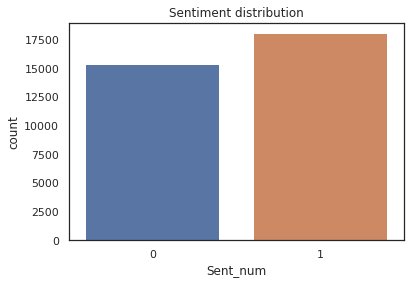

In [ ]:
#data points for each class
print(data['Sent_num'].value_counts())
print("*"*50)

#Count plot for Score
sns.countplot('Sent_num',data = data)
plt.title("Sentiment distribution")

**Text Preprocessing: Stemming, stop-word removal and Lemmatization.**

In [ ]:
x = df.drop('Sent_num', axis=1)
y = df['Sent_num']

In [ ]:
#set of stopwords
import nltk
nltk.download('stopwords')
import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))


#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['CleanedText'] = df['OriginalTweet'].apply(final_sentence)
print(df.shape)
df.head()

(33444, 5)


,UserName,Location,OriginalTweet,Sent_num,CleanedText
1,3800,UK,advice Talk to your neighbours family to excha...,1,advice Talk neighbours family exchange phone n...
2,3801,Vagabonds,Coronavirus Australia: Woolworths to give elde...,1,Coronavirus Woolworths give disabled dedicated...
3,3802,NaN,My food stock is not the only one which is emp...,1,food stock one dont ENOUGH FOOD EVERYONE take ...
4,3803,NaN,"Me, ready to go at supermarket during the #COV...",0,ready supermarket food stock litteraly coronav...
5,3804,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,1,news first confirmed case came Sullivan County...


Bag of Words Model

In [ ]:
# Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_cv = cv.fit_transform(df['CleanedText']).toarray()

In [ ]:
df_cv = pd.concat([df,pd.DataFrame(X_cv)],axis = 1)

In [ ]:
# Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.33, random_state=0)

In [ ]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
X_train, y_train = smote.fit_resample(X_train,y_train)

TF-IDF

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TfIdf = TfidfVectorizer(ngram_range=(1,2)) #in scikit-learn
X = TfIdf.fit_transform(df['CleanedText'].values)


print("the type of count vectorizer ",type(X))
print("the shape of out text BOW vectorizer ",X.get_shape())
print("the number of unique words including both unigrams and bigrams ", X.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (33444, 351850)
the number of unique words including both unigrams and bigrams  351850


In [ ]:
TfIdf.get_feature_names()[:6]

['aaa',
 'aaa officials',
 'aaa says',
 'aaaaakubosan',
 'aaaaas',
 'aaaaas commissions']

In [ ]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

Naive bayes for TF-idf

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt



In [ ]:
mulbnb = MultinomialNB()
mulbnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#Predicting the Test set results
y_pred = mulbnb.predict(X_test)


In [ ]:
from sklearn import metrics

print("Precision recall report for data:\n", metrics.classification_report(y_test, y_pred))

Precision recall report for data:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      4975
           1       0.80      0.79      0.79      6062

    accuracy                           0.77     11037
   macro avg       0.77      0.77      0.77     11037
weighted avg       0.77      0.77      0.77     11037

